In [3]:
#Tweets 2 - Prejudice

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import plotly.offline as py
#For this library it was required to install plotly and geopandas via Conda, also update setuptools and install ez_setup
import plotly.figure_factory as ff  
import vincent
from geopy.geocoders import Nominatim
import xlrd
from scipy.stats import linregress
import seaborn as sns

#Configuration files
from config import gkey
py.offline.init_notebook_mode(connected=True)

In [ ]:
tweets = pd.ExcelFile("Resources/TweetData/1st_Search_Twitter_Posts.xls")
df = tweets.parse("searchd")
df['Longitude'] = ''
df['Latitude'] = ''
df.head(5)

In [6]:
#Variables to be used during data collection
processed = 0
notfound = 0
count = 0

#Loop to collect Lat/Long for Agency Names
for (idx, row) in df.iterrows():
    try:
        #Store current row value for each column
        city = (row.loc['City/Urban Area'])
        state = (row.loc['State/Region'])
        #URL from Google APIs where Lat/Long values will be collected
        query_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={city},{state}&key={gkey}"
        #JSON request
        response = requests.get(query_url).json()
        #Variables to store lat/long values 
        lat = response["results"][0]["geometry"]["location"]["lat"]
        lng = response["results"][0]["geometry"]["location"]["lng"]
        #Lat/Long columns created and respective values stored in current row
        df.at[idx, 'Latitude'] = lat
        df.at[idx, 'Longitude'] = lng
        #Print to verify data is processing as expected
        print(f"{city},{state}:{lat},{lng}")
        #Count to validate how many city names have been processed
        processed += 1
        #Error handling if some of the city names are not found
    except:
        #Print to verify when an city is not found
        print("City not found")
        #Count to validate how many city names were not found
        notfound += 1
        continue
#Print to validate final count for both processed and not found agency names
print(f"{processed} agencies were processed. {notfound} agencies were not found.")


nan,nan:36.103234,-95.87159059999999
Dallas,Texas:32.7766642,-96.79698789999999
Kansas City,Missouri:39.0997265,-94.5785667
nan,Texas:33.1980612,-96.61613229999999
nan,nan:36.103234,-95.87159059999999
nan,nan:36.103234,-95.87159059999999
San Bernardino,California:34.1083449,-117.2897652
nan,New Hampshire:42.7711577,-71.4115492
nan,nan:36.103234,-95.87159059999999
nan,Michigan:39.94414099999999,-86.2374366
Bridgeport,Connecticut:41.1792258,-73.1894384
nan,nan:36.103234,-95.87159059999999
nan,nan:36.103234,-95.87159059999999
nan,nan:36.103234,-95.87159059999999
Houston,Texas:29.7604267,-95.3698028
nan,California:38.257725,-122.0666346
nan,nan:36.103234,-95.87159059999999
nan,Florida:27.913083,-82.5056544
nan,Texas:33.1980612,-96.61613229999999
nan,nan:36.103234,-95.87159059999999
nan,Arizona:33.6548218,-112.3552682
nan,nan:36.103234,-95.87159059999999
Austin,Texas:30.267153,-97.7430608
New York,New York:36.1023715,-115.1745559
nan,Missouri:38.9491861,-92.32857039999999
San Francisco,Cali

In [30]:
#df.to_csv('resources/TweetData/Tweets1_wCoords.csv')
FIPS_df = pd.read_csv('/Users/rorr/PythonStuff/Team_5/Resources/TweetData/Tweets1_wCoords.csv')
FIPS_df['FIPS'] = ''
FIPS_df['County Name'] = ''
FIPS_df['FIPS_block'] = ''

#URL to get FIPS code
url = 'https://geo.fcc.gov/api/census/block/find?'
#Variables to be used during data collection
processed = 0
notfound = 0

#Loop to add FIPS code and County name to Dataframe
for (idx, row) in FIPS_df.iterrows():
    try:
        #Store current row value for each column
        latitude = (row.loc['Latitude'])
        longitude = (row.loc['Longitude'])
        #URL to collect FIPS code and county name
        query_url = f"{url}&latitude={latitude}&longitude={longitude}&format=json"
        #JSON Request
        code = requests.get(query_url).json()
        #Variables to store required values (FIPS codes are converted to strings to keep leading zeros in the code)
        county_fips = str(code["County"]["FIPS"]).zfill(5)
        county_name = code["County"]["name"]
        block_fips = str(code["Block"]["FIPS"]).zfill(15)
        #New columns created and values collected from JSON stored in current row 
        FIPS_df.at[idx, 'FIPS'] = str(county_fips)
        FIPS_df.at[idx, 'County Name'] = county_name
        FIPS_df.at[idx, 'FIPS_block'] = str(block_fips)         
        #Count to validate how many records were processed
        processed += 1
        #Print to verify that information is processed
        print(f"{county_name}:{county_fips}")
    #Error handling if a location is not found
    except:
        #Print to validate if a location is not found
        print("Location Not Found")
        #Count to validate how many records were not found
        notfound += 1
        pass
#Print to validate final count for both processed and not found locations
print(f"{processed} locations were processed. {notfound} locations were not found.")

FIPS_df.head()

Tulsa:40143
Dallas:48113
Jackson:29095
Collin:48085
Tulsa:40143
Tulsa:40143
San Bernardino:06071
Hillsborough:33011
Tulsa:40143
Hamilton:18057
Fairfield:09001
Tulsa:40143
Tulsa:40143
Tulsa:40143
Harris:48201
Solano:06095
Tulsa:40143
Hillsborough:12057
Collin:48085
Tulsa:40143
Maricopa:04013
Tulsa:40143
Travis:48453
Clark:32003
Boone:29019
San Francisco:06075
Tulsa:40143
Collin:48085
Tulsa:40143
Hillsborough:12057
Collin:48085
Tulsa:40143
Copiah:28029
Dodge:31053
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Hennepin:27053
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Miami-Dade:12086
Tulsa:40143
Harris:48201
Tulsa:40143
Spartanburg:45083
Los Angeles:06037
Multnomah:41051
Tulsa:40143
Tulsa:40143
Solano:06095
Fairfield:09001
Tulsa:40143
Tulsa:40143
Tulsa:40143
Tulsa:40143
Collin:48085
Hamilton:18057
Clark:32003
Harris:48201
Tulsa:40143
Tulsa:40143
Tulsa:40143
Hillsborough:33011
Collin:48085
Lowndes:13185
Tulsa:40143
Suffolk:25025
New York:36061
Tra

,Unnamed: 0,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,...,Image URL,Object,Scene,Action,Brand,Longitude,Latitude,FIPS,County Name,FIPS_block
0,0,930303273579532288,2017-11-14 00:15:59,http://twitter.com/___success___/status/930303...,RT @jamKartel White Man: NIGGER Y'all: We need...,@___success___,Cuianna🌺,United States of America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-95.871591,36.103234,40143,Tulsa,401430069061000
1,1,799081689788071936,2016-11-16 21:48:15,http://twitter.com/brianbethel/status/79908168...,If @culturemap is #altright and #blacklivesmat...,@brianbethel,brian bethel,United States of America,Texas,Dallas,...,NaN,NaN,NaN,NaN,NaN,-96.796988,32.776664,48113,Dallas,481130204003064
2,2,831281371540754432,2017-02-13 18:18:18,http://twitter.com/LesIzmoreKC/status/83128137...,RT @Drugg Me: White ppl r annoying *White pers...,@LesIzmoreKC,Octavia Butler's SUN,United States of America,Missouri,Kansas City,...,NaN,NaN,NaN,NaN,NaN,-94.578567,39.099727,29095,Jackson,290950157001027
3,3,851610353024864256,2017-04-10 21:38:24,http://twitter.com/JeffBain6/status/8516103530...,RT @jojoh888 .We have immigration laws for a r...,@JeffBain6,Jeff Bain,United States of America,Texas,NaN,...,NaN,NaN,NaN,NaN,NaN,-96.616132,33.198061,48085,Collin,480850307024049
4,4,722247394423939072,2016-04-18 22:16:12,http://twitter.com/CorinaLankford/status/72224...,RT @VAC4NT_ just a lonely nigger.,@CorinaLankford,Corina Lankford,United States of America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-95.871591,36.103234,40143,Tulsa,401430069061000


In [31]:
# Keep leading zeros
FIPS_df['FIPS'] = FIPS_df['FIPS'].apply(str)
FIPS_df['FIPS_block'] = FIPS_df['FIPS_block'].apply(str)
FIPS_df.to_csv('resources/TweetData/Tweets1_Final.csv')
FIPS_df.head()

,Unnamed: 0,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,...,Image URL,Object,Scene,Action,Brand,Longitude,Latitude,FIPS,County Name,FIPS_block
0,0,930303273579532288,2017-11-14 00:15:59,http://twitter.com/___success___/status/930303...,RT @jamKartel White Man: NIGGER Y'all: We need...,@___success___,Cuianna🌺,United States of America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-95.871591,36.103234,40143,Tulsa,401430069061000
1,1,799081689788071936,2016-11-16 21:48:15,http://twitter.com/brianbethel/status/79908168...,If @culturemap is #altright and #blacklivesmat...,@brianbethel,brian bethel,United States of America,Texas,Dallas,...,NaN,NaN,NaN,NaN,NaN,-96.796988,32.776664,48113,Dallas,481130204003064
2,2,831281371540754432,2017-02-13 18:18:18,http://twitter.com/LesIzmoreKC/status/83128137...,RT @Drugg Me: White ppl r annoying *White pers...,@LesIzmoreKC,Octavia Butler's SUN,United States of America,Missouri,Kansas City,...,NaN,NaN,NaN,NaN,NaN,-94.578567,39.099727,29095,Jackson,290950157001027
3,3,851610353024864256,2017-04-10 21:38:24,http://twitter.com/JeffBain6/status/8516103530...,RT @jojoh888 .We have immigration laws for a r...,@JeffBain6,Jeff Bain,United States of America,Texas,NaN,...,NaN,NaN,NaN,NaN,NaN,-96.616132,33.198061,48085,Collin,480850307024049
4,4,722247394423939072,2016-04-18 22:16:12,http://twitter.com/CorinaLankford/status/72224...,RT @VAC4NT_ just a lonely nigger.,@CorinaLankford,Corina Lankford,United States of America,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-95.871591,36.103234,40143,Tulsa,401430069061000


In [131]:
dtype_dic= {'FIPS': str, 
            'FIPS_block' : str}
prejudice_df = pd.read_csv('/Users/rorr/PythonStuff/Team_5/Resources/TweetData/Tweets1_Final.csv', dtype = dtype_dic )
# Drop Non-Starters
prejudice_df = prejudice_df[pd.notnull(prejudice_df['City/Urban Area'])]
prejudice_df=prejudice_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
prejudice_df['content_state'] = 1
census = pd.read_csv('/Users/rorr/PythonStuff/Team_5/Resources/Census Resources/census_immig.csv'
                         ,dtype = dtype_dic, engine='python'                    )
census=census.drop(columns=['Unnamed: 0','index'])
for (idx, row) in census.iterrows():
    fips_z = (row.loc['state_fips'])
    census.at[idx, 'state_fips'] = str(fips_z).zfill(2)
for (idx, row) in census.iterrows():
    fips_z = (row.loc['combined_fips'])
    census.at[idx, 'FIPS'] = str(fips_z).zfill(5)
prejudice_df = pd.merge(prejudice_df, census, on=["FIPS"], how="outer")
prejudice_df['FIPS'] = prejudice_df['FIPS'].apply(str)
prejudice_State_df = prejudice_df[pd.notnull(prejudice_df['State/Region'])]

merged_tweet1 = prejudice_df.groupby(['FIPS','County Name',
                                      'state_abbr', "Population", 'Total_ForeignBorn'
                                     ,'Total_2010','Total_1990'
                                                     ,'Total_2000','Total_Before90',]
                                    )[['content_state'
                                        ]].sum()
merged_tweet1 = merged_tweet1.reset_index()
prejudice_State_df = prejudice_State_df.reset_index()
for (idx, row) in prejudice_State_df.iterrows():
    fips_z = (row.loc['state_fips'])
    prejudice_State_df.at[idx, 'state_fips'] = str(fips_z).zfill(2)
merged_tweet1.head()

,FIPS,County Name,state_abbr,Population,Total_ForeignBorn,Total_2010,Total_1990,Total_2000,Total_Before90,content_state
0,01073,Jefferson,AL,659096.0,25875.0,4427.0,4981.0,11877.0,4590.0,3.0
1,01081,Lee,AL,153947.0,7940.0,2509.0,1065.0,3088.0,1278.0,2.0
2,01089,Madison,AL,349973.0,19461.0,2691.0,4101.0,6533.0,6136.0,2.0
3,01097,Mobile,AL,414291.0,12864.0,2307.0,2426.0,4145.0,3986.0,2.0
4,01101,Montgomery,AL,227392.0,9912.0,2383.0,1659.0,3331.0,2539.0,4.0


In [132]:
prejudice_State_df['state_fips'] = prejudice_State_df['state_fips'].apply(str)
merged_tweet1_state = prejudice_State_df.groupby(['State/Region','state_abbr' 
                                                  ])[['content_state','Total_ForeignBorn', 'Total_2010','Total_1990'
                                                     ,'Total_2000','Total_Before90', "Population"]].sum()
merged_tweet1_state = merged_tweet1_state.reset_index()
merged_tweet1_state['Population'] = merged_tweet1_state['Population'].apply(float)
#print((merged_tweet1_state.head()))
merged_tweet1_state['values'] = (merged_tweet1_state['content_state']/merged_tweet1_state['Population'])*33000000
merged_tweet1_state.head(1)

,State/Region,state_abbr,content_state,Total_ForeignBorn,Total_2010,Total_1990,Total_2000,Total_Before90,Population,values
0,Alabama,AL,18.0,233438.0,48602.0,41353.0,89967.0,53516.0,5735633.0,100.424835


In [133]:
colorscale = ["#fff7ec","#fee8c8","#fdd49e","#fdbb84","#fc8d59","#ef6548","#d7301f","#b30000","#7f0000","#f9f9f9"]
endpts = list(np.linspace(0, 100, len(colorscale)-1))
values = merged_tweet1_state['values'] 
scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(218,218,235)'],[2.0, 'rgb(188,189,220)'],\
            [3.0, 'rgb(158,154,200)'],[4.0, 'rgb(117,107,177)'],[5.0, 'rgb(84,39,143)']]
merged_tweet1_state['text'] = 'Racial Anxiety by State in '+merged_tweet1_state['state_abbr']+' in 2015-17'
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = merged_tweet1_state['state_abbr'],
        z = values,
        locationmode = 'USA-states',
        text = merged_tweet1_state['text'],
        zauto = False,
        zmax = 100.0,
        zmin = 0.0,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',width = 2
            ) ),
        colorbar = dict(
            title = "Racially-Charged Tweet Index")) ]
layout = dict(
        title = 'Racial Animus by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
fig
py.plot( fig, filename='Raw_Racism-map.html' )

'file:///Users/rorr/PythonStuff/Team_5/Raw_Racism-map.html'

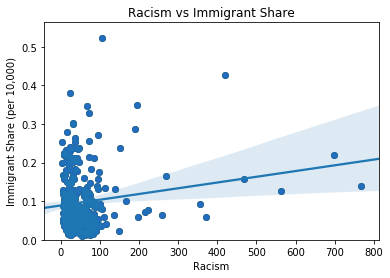

In [152]:
_2010 = merged_tweet1['Total_2010']/merged_tweet1['Population']
_2000 = merged_tweet1['Total_2000']/merged_tweet1['Population']
_1990 = merged_tweet1['Total_1990']/merged_tweet1['Population']
_1980 = merged_tweet1['Total_Before90']/merged_tweet1['Population']

immigrant_rate_state = merged_tweet1_state['Total_ForeignBorn']/merged_tweet1_state['Population']
merged_tweet1_state = merged_tweet1_state[merged_tweet1_state['content_state'] != 0]

immigrant_rate = merged_tweet1['Total_ForeignBorn']/merged_tweet1['Population']
merged_tweet1 = merged_tweet1[merged_tweet1['content_state'] != 0]
racism = (merged_tweet1['content_state']/merged_tweet1['Population'])*3300000

plt.clf()
plt.scatter(racism, immigrant_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=racism, y=immigrant_rate, data=merged_tweet1);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racism vs Immigrant Share")
plt.ylabel("Immigrant Share (per 10,000)")
plt.xlabel("Racism")
plt.savefig("Racism-vs-ShareOfPopulation_Total.png")
plt.show()

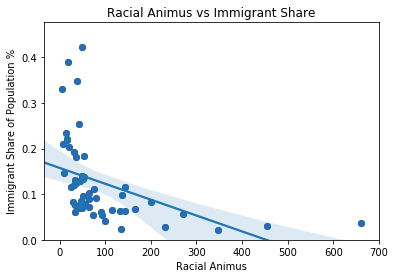

In [153]:
plt.clf()
plt.scatter(values, immigrant_rate_state, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=values, y=immigrant_rate_state, data=merged_tweet1_state);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racial Animus vs Immigrant Share")
plt.ylabel("Immigrant Share of Population %")
plt.xlabel("Racial Animus")
plt.savefig("Racial-Animus-vs-Immigrant_Total(State).png")
plt.show()

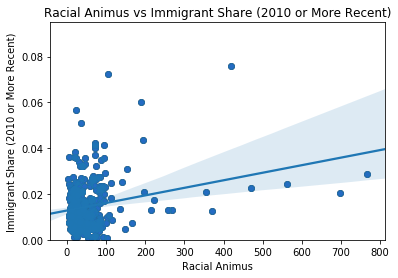

In [154]:
plt.clf()
plt.scatter(racism, _2010, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=racism, y=_2010, data=merged_tweet1);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racial Animus vs Immigrant Share (2010 or More Recent)")
plt.ylabel("Immigrant Share (2010 or More Recent)")
plt.xlabel("Racial Animus")
plt.savefig("Racism-vs-ShareOfPopulation_2010(orMoreRecent).png")
plt.show()

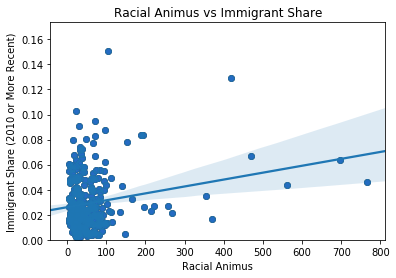

In [155]:
plt.clf()
plt.scatter(racism, _2000, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=racism, y=_2000, data=merged_tweet1);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racial Animus vs Immigrant Share")
plt.ylabel("Immigrant Share (2010 or More Recent)")
plt.xlabel("Racial Animus")
plt.savefig("Racism-vs-ShareOfPopulation_2000-2010.png")
plt.show()

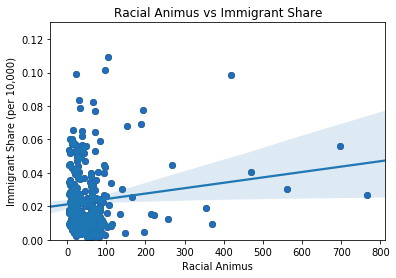

In [156]:
plt.clf()
plt.scatter(racism, _1990, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=racism, y=_1990, data=merged_tweet1);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racial Animus vs Immigrant Share")
plt.ylabel("Immigrant Share (per 10,000)")
plt.xlabel("Racial Animus")
plt.savefig("Racism-vs-ShareOfPopulation_1990-2000.png")
plt.show()

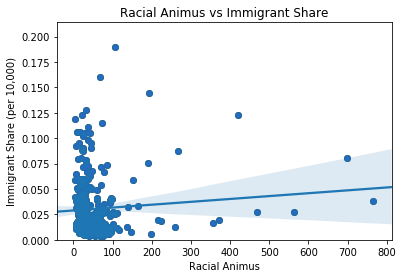

In [157]:
plt.clf()
plt.scatter(racism, _1980, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=racism, y=_1980, data=merged_tweet1);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Racial Animus vs Immigrant Share")
plt.ylabel("Immigrant Share (per 10,000)")
plt.xlabel("Racial Animus")
plt.savefig("Racism-vs-ShareOfPopulation_1989orEarlier.png")
plt.show()

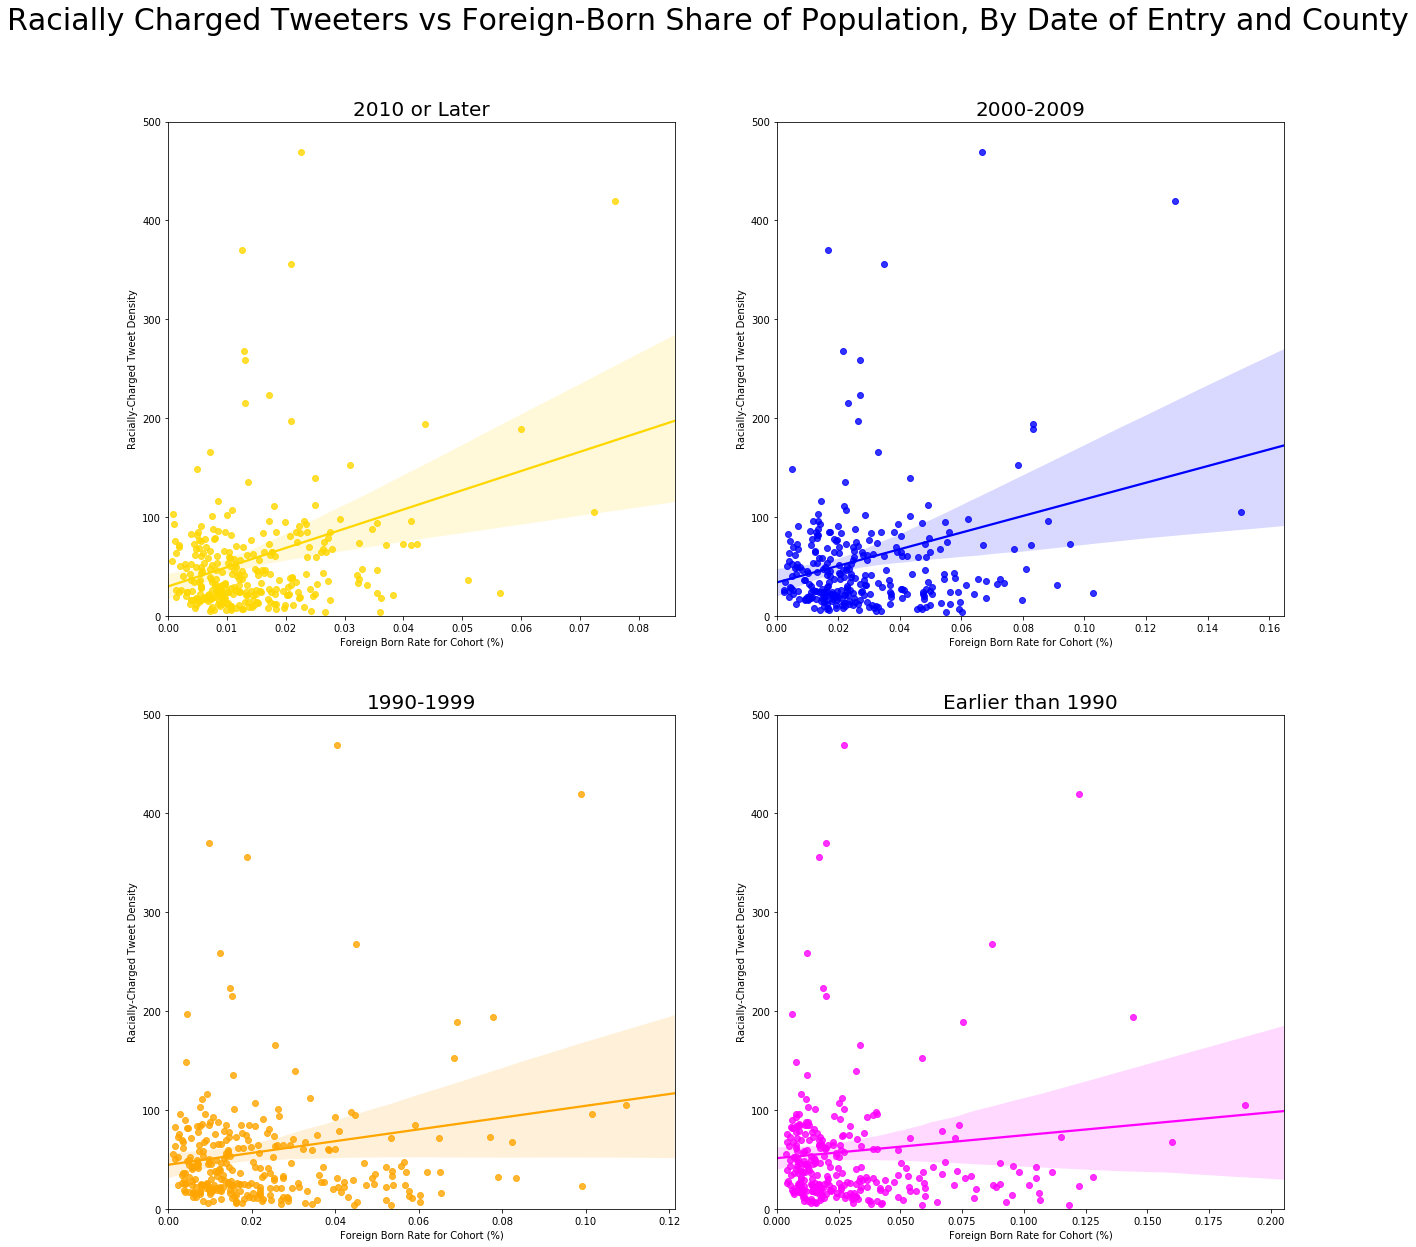

In [161]:
_2010 = merged_tweet1['Total_2010']/merged_tweet1['Population']
_2000 = merged_tweet1['Total_2000']/merged_tweet1['Population']
_1990 = merged_tweet1['Total_1990']/merged_tweet1['Population']
_1980 = merged_tweet1['Total_Before90']/merged_tweet1['Population']
immigrant_rate = merged_tweet1['Total_ForeignBorn']/merged_tweet1['Population']

plt.clf()
fig, axs = plt.subplots(figsize=(20,20), ncols=2, nrows=2)
sns.regplot(x=_2010, y=racism, data=_2010, color="gold", label="2010 or Later", ax=axs[0][0])
sns.regplot(x=_2000, y=racism, data=_2000, color="blue", label="2000-2009", ax=axs[0][1])
sns.regplot(x=_1990, y=racism, data=_1990, color="orange", label="1990-1999", ax=axs[1][0])
sns.regplot(x=_1980, y=racism, data=_1980, color="magenta", label="1989 or Earlier", ax=axs[1][1])

axs[0][0].set_title("2010 or Later", size=20)
axs[0][1].set_title("2000-2009", size=20)
axs[1][0].set_title("1990-1999", size=20)
axs[1][1].set_title("Earlier than 1990", size=20)

[axs[i][0].set_xlabel("Foreign Born Rate for Cohort (%)") for i in range(0, 2)]
[axs[i][1].set_xlabel("Foreign Born Rate for Cohort (%)") for i in range(0, 2)]
[axs[0][i].set_ylabel("Racially-Charged Tweet Density") for i in range(0, 2)]
[axs[1][i].set_ylabel("Racially-Charged Tweet Density") for i in range(0, 2)]

[axs[i][0].set_xlim(0,) for i in range(0,2)]
[axs[i][1].set_xlim(0,) for i in range(0,2)]
[axs[i][0].set_ylim(0,500) for i in range(0,2)]
[axs[i][1].set_ylim(0,500) for i in range(0,2)]

plt.suptitle("Racially Charged Tweeters vs Foreign-Born Share of Population, By Date of Entry and County", y = 0.96, fontsize=30)
plt.savefig("RacismVImmigrants_County.png")
plt.show()

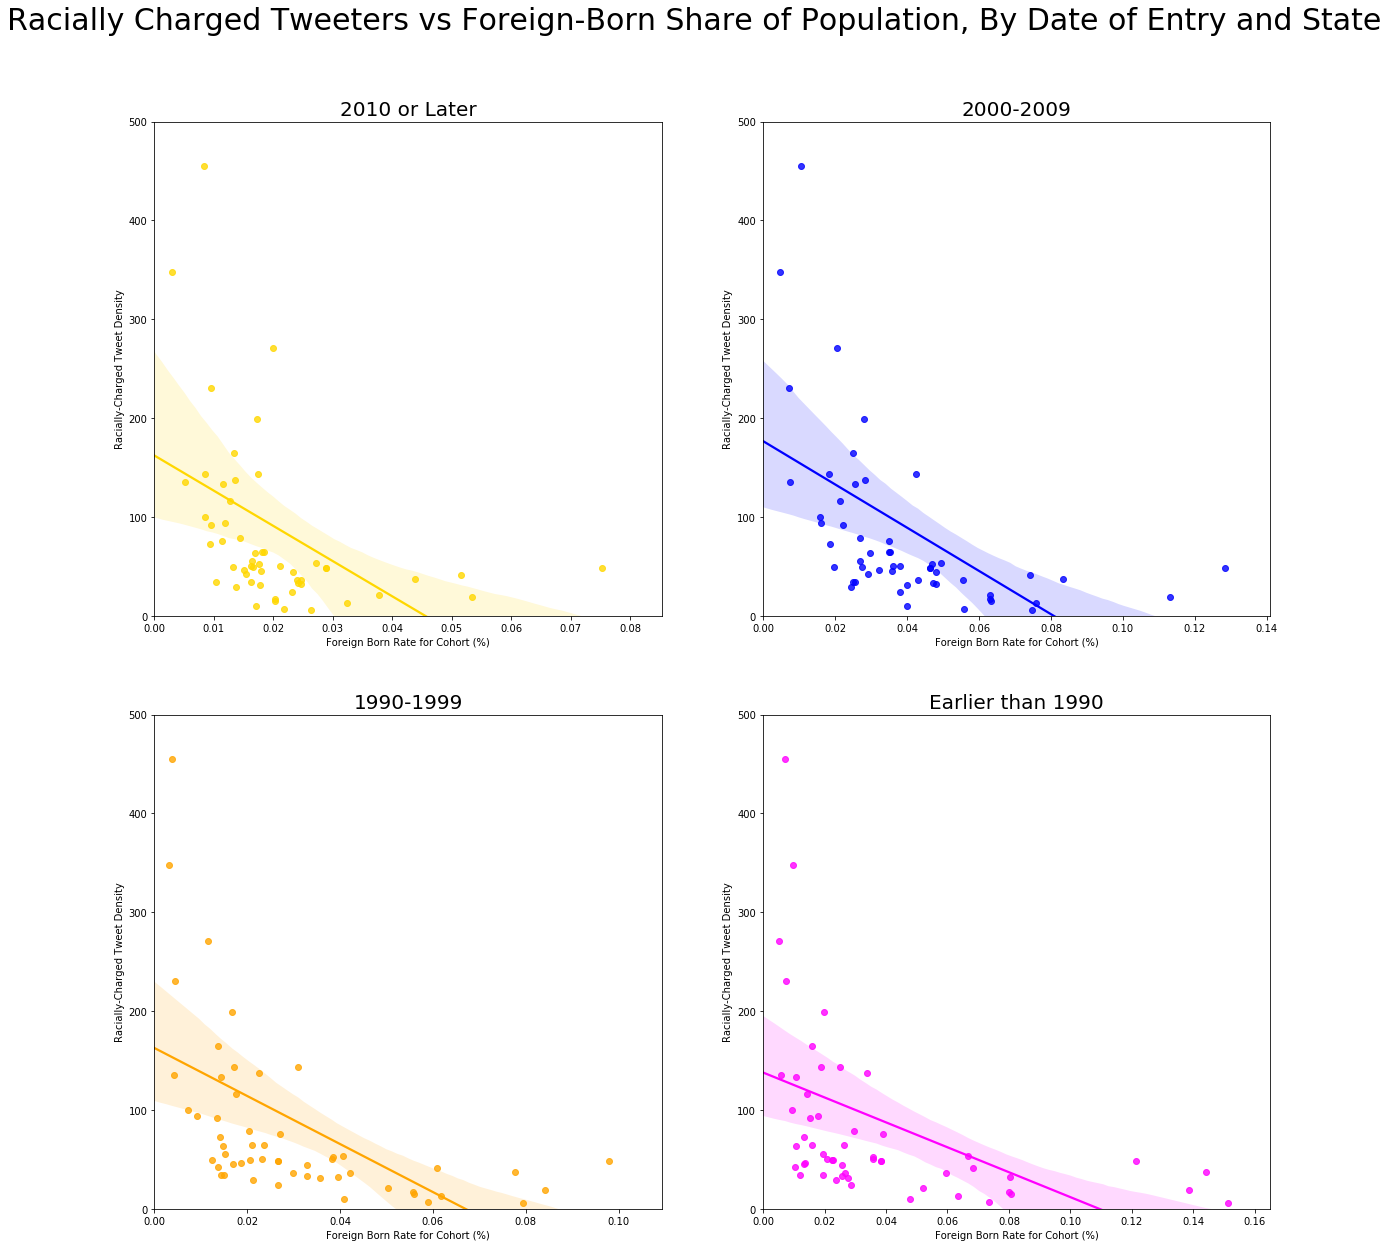

['FIPS', 'County Name', 'state_abbr', 'Population', 'Total_ForeignBorn', 'Total_2010', 'Total_1990', 'Total_2000', 'Total_Before90', 'content_state']


In [162]:
State_2010 = merged_tweet1_state['Total_2010']/merged_tweet1_state['Population']
State_2000 = merged_tweet1_state['Total_2000']/merged_tweet1_state['Population']
State_1990 = merged_tweet1_state['Total_1990']/merged_tweet1_state['Population']
State_1980 = merged_tweet1_state['Total_Before90']/merged_tweet1_state['Population']
State_immigrant_rate = merged_tweet1_state['Total_ForeignBorn']/merged_tweet1_state['Population']

plt.clf()
fig, axs = plt.subplots(figsize=(20,20), ncols=2, nrows=2)
sns.regplot(x=State_2010, y=values, data=State_2010, color="gold", label="2010 or Later", ax=axs[0][0])
sns.regplot(x=State_2000, y=values, data=State_2000, color="blue", label="2000-2009", ax=axs[0][1])
sns.regplot(x=State_1990, y=values, data=State_1990, color="orange", label="1990-1999", ax=axs[1][0])
sns.regplot(x=State_1980, y=values, data=State_1980, color="magenta", label="1989 or Earlier", ax=axs[1][1])

axs[0][0].set_title("2010 or Later", size=20)
axs[0][1].set_title("2000-2009", size=20)
axs[1][0].set_title("1990-1999", size=20)
axs[1][1].set_title("Earlier than 1990", size=20)

[axs[i][0].set_xlabel("Foreign Born Rate for Cohort (%)") for i in range(0, 2)]
[axs[i][1].set_xlabel("Foreign Born Rate for Cohort (%)") for i in range(0, 2)]
[axs[0][i].set_ylabel("Racially-Charged Tweet Density") for i in range(0, 2)]
[axs[1][i].set_ylabel("Racially-Charged Tweet Density") for i in range(0, 2)]

[axs[i][0].set_xlim(0,) for i in range(0,2)]
[axs[i][1].set_xlim(0,) for i in range(0,2)]
[axs[i][0].set_ylim(0,500) for i in range(0,2)]
[axs[i][1].set_ylim(0,500) for i in range(0,2)]

plt.suptitle("Racially Charged Tweeters vs Foreign-Born Share of Population, By Date of Entry and State", y = 0.96, fontsize=30)
plt.savefig("RacismVImmigrants_4Chart_State.png")
plt.show()
print(list(merged_tweet1.columns.values))
